In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt

In [23]:
file = pd.read_csv("/Users/rinkukharbanda/Desktop/Candy Prog/winequalityN.csv")
file = file.interpolate()
file.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [115]:

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.hidden_layer_input = np.dot(X, self.weights_input_hidden)
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_input + self.bias_hidden)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output)
        self.predicted_output = self.sigmoid(self.output_layer_input + self.bias_output)
        return self.predicted_output

    def backward(self, X, y, learning_rate):
        error = y - self.predicted_output
        output_delta = error * self.sigmoid_derivative(self.predicted_output)
        
        hidden_layer_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_layer_delta = hidden_layer_error * self.sigmoid_derivative(self.hidden_layer_output)

        self.weights_hidden_output += self.hidden_layer_output.T.dot(output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis = 0) * learning_rate
        self.weights_input_hidden += X.T.dot(hidden_layer_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_layer_delta, axis = 0) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            predicted_output = self.forward(X)

            self.backward(X, y, learning_rate)
            mse = np.mean(np.square(y - predicted_output))
            print("Epoch", epoch, "Mean Squared Error:", mse)
    

           
               
    def calculate_accuracy(self, X, y):
        predicted_output = self.forward(X)
        predicted_labels = np.round(predicted_output)
        correct_predictions = (predicted_labels == y).all(axis=1).sum()
        accuracy = correct_predictions / len(y)
        return accuracy
    
    

            

In [116]:
input=file[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]
output=file[["quality"]]

In [117]:
inp = (input - input.mean()) / input.std() 
out = (output - output.mean()) / output.std()

In [118]:
inp_array = inp.to_numpy()
X_train = inp_array[0:300]
X_test = inp_array[300:500]
out_array = out.to_numpy()
Y_train = out_array[0:300]
Y_test = out_array[300:500]


In [119]:
nn=NeuralNetwork(input_size=11, hidden_size=6, output_size=1)
nn.train(train_inp,train_out, epochs=50000, learning_rate=0.01)

Epoch 0 Mean Squared Error: 1.8755421235646366
Epoch 1 Mean Squared Error: 1.5513488542179852
Epoch 2 Mean Squared Error: 1.2676877353410025
Epoch 3 Mean Squared Error: 1.2005165894803544
Epoch 4 Mean Squared Error: 1.1779837498419108
Epoch 5 Mean Squared Error: 1.166189753879143
Epoch 6 Mean Squared Error: 1.1587259185496421
Epoch 7 Mean Squared Error: 1.1534732088539545
Epoch 8 Mean Squared Error: 1.149512704124723
Epoch 9 Mean Squared Error: 1.14637605393371
Epoch 10 Mean Squared Error: 1.1437971721854012
Epoch 11 Mean Squared Error: 1.1416124859711707
Epoch 12 Mean Squared Error: 1.1397151623611605
Epoch 13 Mean Squared Error: 1.1380319392136184
Epoch 14 Mean Squared Error: 1.136510473659287
Epoch 15 Mean Squared Error: 1.1351120007871653
Epoch 16 Mean Squared Error: 1.1338068538893404
Epoch 17 Mean Squared Error: 1.132571610807094
Epoch 18 Mean Squared Error: 1.131387205646948
Epoch 19 Mean Squared Error: 1.1302376346907463
Epoch 20 Mean Squared Error: 1.129109038965873
Epoch 21 M

In [120]:
predicted=nn.forward(X_test)
print(predicted)

[[3.40328690e-05]
 [8.70957111e-01]
 [3.40328690e-05]
 [6.30340765e-02]
 [6.21304042e-11]
 [6.21304042e-11]
 [5.72551943e-11]
 [6.05882262e-11]
 [1.12606125e-05]
 [8.52694356e-07]
 [9.99964511e-01]
 [9.99519783e-01]
 [1.38017770e-01]
 [4.67207806e-01]
 [4.50642351e-01]
 [3.26552271e-09]
 [9.46396849e-01]
 [1.12661474e-04]
 [3.92112699e-03]
 [9.65405452e-01]
 [1.00000000e+00]
 [1.12661474e-04]
 [9.46396849e-01]
 [3.19439722e-08]
 [4.72493910e-09]
 [2.26567237e-01]
 [9.00442779e-09]
 [2.85130545e-01]
 [1.25224222e-02]
 [2.22208875e-02]
 [1.00000000e+00]
 [9.12289607e-01]
 [9.96618828e-01]
 [3.40995988e-12]
 [1.20941744e-01]
 [9.96618828e-01]
 [8.36467322e-01]
 [8.92646077e-07]
 [3.12435025e-09]
 [1.00000000e+00]
 [1.48676731e-15]
 [7.72025202e-06]
 [1.37327828e-17]
 [3.05552666e-04]
 [7.13910259e-02]
 [4.24970984e-05]
 [9.99969355e-01]
 [5.55047654e-03]
 [2.38781902e-12]
 [1.25204103e-05]
 [1.00000000e+00]
 [9.55452172e-01]
 [1.30618653e-10]
 [9.55452172e-01]
 [5.06217757e-13]
 [4.807960

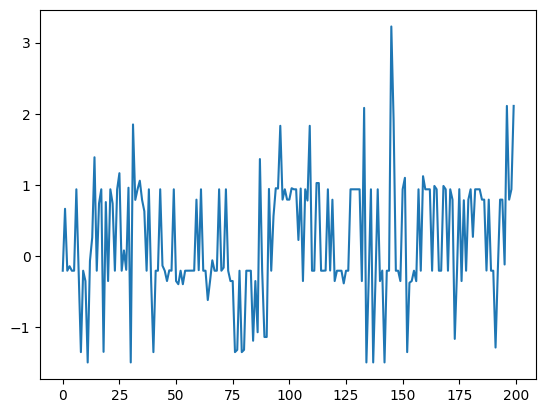

In [125]:
plt.plot((predicted-Y_test))  #error

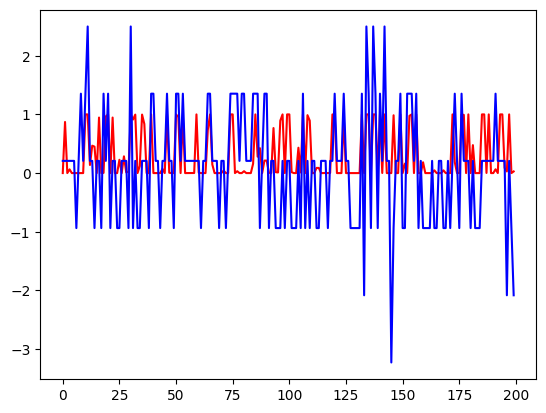

In [127]:
plt.plot(predicted,color='red' )
plt.plot(Y_test,color='blue' )